Relations Between restaurants scores and population data in NYC

My first dataset come from enigma, which is acquired from the unannounced inspections of restaurants conducted by New York City Health Department at least once a year. Inspectors check for compliance in food handling, food temperature, personal hygiene and vermin control. Each violation of a regulation gets a certain number of points. At the end of the inspection, the inspector totals the points, and this number is the restaurant's inspection score—the lower the score, the better the grade.

The sencond dataset contains information about the population information based on zipcode such as the count of participants, count of female and so on.

My project is created to try to get the top ranked restaurants based on its zipcode and compare the mean score of restaurants with the demographic data.

In [52]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import hist

In [142]:
df = pd.read_csv('NYC.csv')
df_demogra = pd.read_csv('Demographic_Statistics_By_Zip_Code.csv')

In [54]:
df.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_code,violation_description,critical_flag,score,grade,grade_date,record_date,inspection_type
0,41451985,BRANCACCIO'S FOOD SHOP,BROOKLYN,3011,FORT HAMILTON PARKWAY,11218.0,7184351997,Sandwiches,2017-03-02T00:00:00+00:00,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,26.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
1,50017896,SANGRIA,QUEENS,2902,FRANCIS LEWIS BLVD,11358.0,7183582727,Spanish,2016-12-23T00:00:00+00:00,Violations were cited in the following area(s).,02H,Food not cooled by an approved method whereby ...,Critical,12.0,A,2016-12-23T00:00:00+00:00,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
2,50002037,CHABBA BBQ/FAMILY GRILL & CUISINE,BROOKLYN,786,CONEY ISLAND AVENUE,11218.0,9178938844,Indian,2016-01-04T00:00:00+00:00,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,33.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
3,41172677,GREENLEAF'S/BANANAS,STATEN ISLAND,2655,RICHMOND AVENUE,10314.0,7183707345,Sandwiches/Salads/Mixed Buffet,2015-06-22T00:00:00+00:00,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,18.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Initial Inspection
4,41583191,QUEZADA RESTAURANT,BROOKLYN,1212,FLATBUSH AVENUE,11226.0,7182820622,"Latin (Cuban, Dominican, Puerto Rican, South &...",2018-01-23T00:00:00+00:00,Establishment Closed by DOHMH. Violations wer...,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,30.0,NaN,NaN,2018-10-09T06:00:44+00:00,Cycle Inspection / Re-inspection


In [168]:
df_demogra.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100


Clean the data, drop columns that will not be used

In [143]:
df_clean = df.drop(['grade', 'record_date', 'critical_flag', 'violation_code'], axis = 1)
df_clean.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_description,score,grade_date,inspection_type
0,41451985,BRANCACCIO'S FOOD SHOP,BROOKLYN,3011,FORT HAMILTON PARKWAY,11218.0,7184351997,Sandwiches,2017-03-02T00:00:00+00:00,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,26.0,NaN,Cycle Inspection / Initial Inspection
1,50017896,SANGRIA,QUEENS,2902,FRANCIS LEWIS BLVD,11358.0,7183582727,Spanish,2016-12-23T00:00:00+00:00,Violations were cited in the following area(s).,Food not cooled by an approved method whereby ...,12.0,2016-12-23T00:00:00+00:00,Cycle Inspection / Initial Inspection
2,50002037,CHABBA BBQ/FAMILY GRILL & CUISINE,BROOKLYN,786,CONEY ISLAND AVENUE,11218.0,9178938844,Indian,2016-01-04T00:00:00+00:00,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,33.0,NaN,Cycle Inspection / Initial Inspection
3,41172677,GREENLEAF'S/BANANAS,STATEN ISLAND,2655,RICHMOND AVENUE,10314.0,7183707345,Sandwiches/Salads/Mixed Buffet,2015-06-22T00:00:00+00:00,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,18.0,NaN,Cycle Inspection / Initial Inspection
4,41583191,QUEZADA RESTAURANT,BROOKLYN,1212,FLATBUSH AVENUE,11226.0,7182820622,"Latin (Cuban, Dominican, Puerto Rican, South &...",2018-01-23T00:00:00+00:00,Establishment Closed by DOHMH. Violations wer...,Cold food item held above 41Âº F (smoked fish ...,30.0,NaN,Cycle Inspection / Re-inspection



Now drop the 'NAN' values in 'score' column


In [156]:
df_val = df_clean.loc[df_clean['score'].dropna().index]
df_zip = df_val.loc[df_val['zipcode'].dropna().index]
df_zip.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,violation_description,score,grade_date,inspection_type
0,41451985,BRANCACCIO'S FOOD SHOP,BROOKLYN,3011,FORT HAMILTON PARKWAY,11218.0,7184351997,Sandwiches,2017-03-02T00:00:00+00:00,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,26.0,NaN,Cycle Inspection / Initial Inspection
1,50017896,SANGRIA,QUEENS,2902,FRANCIS LEWIS BLVD,11358.0,7183582727,Spanish,2016-12-23T00:00:00+00:00,Violations were cited in the following area(s).,Food not cooled by an approved method whereby ...,12.0,2016-12-23T00:00:00+00:00,Cycle Inspection / Initial Inspection
2,50002037,CHABBA BBQ/FAMILY GRILL & CUISINE,BROOKLYN,786,CONEY ISLAND AVENUE,11218.0,9178938844,Indian,2016-01-04T00:00:00+00:00,Violations were cited in the following area(s).,Evidence of mice or live mice present in facil...,33.0,NaN,Cycle Inspection / Initial Inspection
3,41172677,GREENLEAF'S/BANANAS,STATEN ISLAND,2655,RICHMOND AVENUE,10314.0,7183707345,Sandwiches/Salads/Mixed Buffet,2015-06-22T00:00:00+00:00,Violations were cited in the following area(s).,Facility not vermin proof. Harborage or condit...,18.0,NaN,Cycle Inspection / Initial Inspection
4,41583191,QUEZADA RESTAURANT,BROOKLYN,1212,FLATBUSH AVENUE,11226.0,7182820622,"Latin (Cuban, Dominican, Puerto Rican, South &...",2018-01-23T00:00:00+00:00,Establishment Closed by DOHMH. Violations wer...,Cold food item held above 41Âº F (smoked fish ...,30.0,NaN,Cycle Inspection / Re-inspection


Gruop the dataframe by zipcode and then calculate the mean score under different zipcode

In [163]:
df_group = df_zip.groupby('zipcode')

In [175]:
df_group['score'].mean().head()

zipcode
10000.0    16.666667
10001.0    19.198595
10002.0    20.924588
10003.0    19.710992
10004.0    17.666858
Name: score, dtype: float64

In [177]:
df_mean = df_group['score'].mean().to_frame()
df_mean.head()

,score
zipcode,
10000.0,16.666667
10001.0,19.198595
10002.0,20.924588
10003.0,19.710992
10004.0,17.666858


Reset the index to be prepared for merge

In [194]:
df_reset = df_mean.reset_index()
df_reset.head()

,zipcode,score
0,10000.0,16.666667
1,10001.0,19.198595
2,10002.0,20.924588
3,10003.0,19.710992
4,10004.0,17.666858


In [181]:
df_demogra.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100


In [189]:
df_fil_demo = df_demogra[['JURISDICTION NAME','COUNT PARTICIPANTS','COUNT FEMALE','PERCENT FEMALE','COUNT MALE','PERCENT MALE']]
df_fil_demo.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE
0,10001,44,22,0.50,22,0.50
1,10002,35,19,0.54,16,0.46
2,10003,1,1,1.00,0,0.00
3,10004,0,0,0.00,0,0.00
4,10005,2,2,1.00,0,0.00


Merge the two dataset

In [200]:
df_merge = df_fil_demo.merge(df_reset, how = 'left', left_on = 'JURISDICTION NAME', right_on = 'zipcode')
df_merge.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,zipcode,score
0,10001,44,22,0.50,22,0.50,10001.0,19.198595
1,10002,35,19,0.54,16,0.46,10002.0,20.924588
2,10003,1,1,1.00,0,0.00,10003.0,19.710992
3,10004,0,0,0.00,0,0.00,10004.0,17.666858
4,10005,2,2,1.00,0,0.00,10005.0,19.273284


Sort the value of scores 

In [206]:
df_merge = df_merge.drop('zipcode', axis =1).sort_values('score')
df_merge.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,score
44,10154,0,0,0.0,0,0.0,8.040000
156,11371,0,0,0.0,0,0.0,9.600000
17,10020,0,0,0.0,0,0.0,14.412281
38,10044,0,0,0.0,0,0.0,14.469136
202,11692,0,0,0.0,0,0.0,15.626168


Blow are some data analysis based on the fisrt dataset:

In [57]:
boro_array = df_val['boro'].unique()
boro_array

array(['BROOKLYN', 'QUEENS', 'STATEN ISLAND', 'MANHATTAN', 'BRONX',
       'Missing'], dtype=object)

In [58]:
df_brooklyn = df_val[df_val['boro'] == 'BROOKLYN']
df_queens = df_val[df_val['boro'] == 'QUEENS']
df_sta_island = df_val[df_val['boro'] == 'STATEN ISLAND']
df_manhattan = df_val[df_val['boro'] == 'MANHATTAN']
df_bronx = df_val[df_val['boro'] == 'BRONX']

Check if the minimum score for each restaurant in these 5 boroughs are the same or not

In [59]:
df_brooklyn['score'].min() == df_queens['score'].min() == df_sta_island['score'].min() ==df_manhattan['score'].min() == df_bronx['score'].min()

True

In [136]:
bkmin = df_brooklyn['score'].min()
qwnsmin = df_queens['score'].min()
simin = df_sta_island['score'].min()
mnhmin = df_manhattan['score'].min()
bxmin = df_bronx['score'].min()

In [137]:
city_min = min(bkmin, qwnsmin, simin, mnhmin, bxmin)

In [138]:
city_min

-1.0

In [134]:
min(-2, -3)

-3

In [60]:
df_brooklyn['score'].min()

-1.0

In [139]:
print(len(df_brooklyn[df_brooklyn['score'] == city_min]))
print(len(df_queens[df_queens['score'] == city_min]))
print(len(df_sta_island[df_sta_island['score'] == city_min]))
print(len(df_manhattan[df_manhattan['score'] == city_min]))
print(len(df_bronx[df_bronx['score'] == city_min]))

20
17
4
45
6


These numbers indicate that Manhattan has the most restaurants(45) with a the best inspection score, followed by Brooklyn and Queens, the socre of which are 20 and 17 respectively. Then we have Staten Island and Bronx which have the least number of the restaurants with the best inspection score. Based on the data, we can plot the histogram regarding the number of best restaurants in each borough.

In [140]:
print(len(df_brooklyn[df_brooklyn['score'] == bkmin]))
print(len(df_queens[df_queens['score'] == qwnsmin]))
print(len(df_sta_island[df_sta_island['score'] == simin]))
print(len(df_manhattan[df_manhattan['score'] == mnhmin]))
print(len(df_bronx[df_bronx['score'] == bxmin]))

20
17
4
45
6


(array([ 6.,  0., 20.,  0.,  0., 45.,  0., 17.,  0.,  4.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

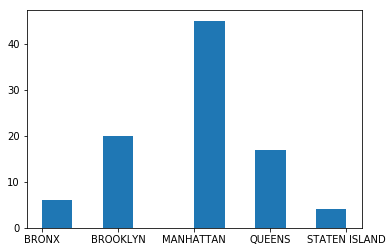

In [68]:
df_boro_score = df_val[df_val['score'] == -1]
hist(df_boro_score.boro, weights = -df_boro_score.score)

In [106]:
df_val['cuisine_description'].value_counts().head(5)

American                                                            78594
Chinese                                                             38202
CafÃ©/Coffee/Tea                                                    16218
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    16101
Pizza                                                               15985
Name: cuisine_description, dtype: int64

In [113]:
cuisine_list = df_val['cuisine_description'].value_counts().head(5).index.tolist()
cuisine_list

['American',
 'Chinese',
 'CafÃ©/Coffee/Tea',
 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
 'Pizza']

In [121]:
df_top5 = df_val[df_val['cuisine_description'].str.contains('American|Chinese|CafÃ©/Coffee/Tea|Latin|Pizza|Italian|Mexican|Japanese')]
df_top5.cuisine_description.unique()

array(['Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'Chinese', 'American', 'Pizza/Italian', 'CafÃ©/Coffee/Tea',
       'Japanese', 'Pizza', 'Italian', 'Mexican', 'Chinese/Japanese',
       'Chinese/Cuban'], dtype=object)

In [123]:
#df_top5.drop(df_top5['cuisine_description'] == 'Chinese/Japanese')

In [111]:
df_american = df_val[df_val['cuisine_description'] == 'American']
df_chinese = df_val[df_val['cuisine_description'] == 'Chinese']
df_cafe = df_val[df_val['cuisine_description'] == 'CafÃ©/Coffee/Tea']
df_latin = df_val[df_val['cuisine_description'] == 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)']
df_pizza = df_val[df_val['cuisine_description'] == 'Pizza']

In [131]:
df_american['score'].min() == df_chinese['score'].min() == df_latin['score'].min() == -1

True

In [132]:
df_cafe['score'].min() == df_pizza['score'].min() == 0

True